In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [4]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 991.0 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 2.8 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 5.7 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
df = pd.read_csv("traces/final_traces/final_traces_merged.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092279 entries, 0 to 2092278
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0.1        int64  
 1   Unnamed: 0          int64  
 2   heading             float64
 3   latitude            float64
 4   longitude           float64
 5   traceid             object 
 6   sampledate          object 
 7   speed               float64
 8   great_circle        float64
 9   euclidean_distance  float64
 10  LABEL               float64
 11  speed_change        float64
 12  heading_change      float64
dtypes: float64(9), int64(2), object(2)
memory usage: 207.5+ MB


In [7]:
# Drop the columns 'Unnamed: 0' and 'Unnamed: 0.1'
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

# Drop all rows with any NaN values
df = df.dropna()

# Save the cleaned DataFrame to a new file if needed
df.to_csv('cleaned_file_final.csv', index=False)

In [8]:
dfd= pd.read_csv("cleaned_file_final.csv")

In [9]:
dfd.head()

,heading,latitude,longitude,traceid,sampledate,speed,great_circle,euclidean_distance,LABEL,speed_change,heading_change
0,259.0,53.627724,10.139101,00HjD2xmRiGrBsdi3HOhXQ,2024-07-11 17:17:50,5.0,556.360097,0.139938,0.0,-3.0,13.0
1,248.0,53.627702,10.138993,00HjD2xmRiGrBsdi3HOhXQ,2024-07-11 17:17:51,13.0,563.832351,0.140866,0.0,8.0,11.0
2,192.0,53.627692,10.138991,00HjD2xmRiGrBsdi3HOhXQ,2024-07-11 17:17:52,9.0,564.401611,0.140944,0.0,-4.0,56.0
3,248.0,53.627685,10.138923,00HjD2xmRiGrBsdi3HOhXQ,2024-07-11 17:17:53,8.0,568.746502,0.141475,0.0,-1.0,-56.0
4,197.0,53.627665,10.138879,00HjD2xmRiGrBsdi3HOhXQ,2024-07-11 17:17:58,4.0,572.342993,0.141927,0.0,3.0,51.0


In [10]:
dfd['sampledate'] = pd.to_datetime(dfd['sampledate'])

# Sort values by traceid and sampledate
dff = dfd.sort_values(by=['traceid', 'sampledate'])

# Calculate the time difference in seconds for each traceid group
dff['time_difference'] = dff.groupby('traceid')['sampledate'].diff().dt.total_seconds().fillna(0)

# Calculate the curvature as great_circle / euclidean_distance
# # Ensure division by zero or invalid values (NaN, inf) are handled
# dff['curvature'] = dff['great_circle'] / dff['euclidean_distance']
# dff['curvature'] = dff['curvature'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [11]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356475 entries, 224953 to 142180
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   heading             356475 non-null  float64       
 1   latitude            356475 non-null  float64       
 2   longitude           356475 non-null  float64       
 3   traceid             356475 non-null  object        
 4   sampledate          356475 non-null  datetime64[ns]
 5   speed               356475 non-null  float64       
 6   great_circle        356475 non-null  float64       
 7   euclidean_distance  356475 non-null  float64       
 8   LABEL               356475 non-null  float64       
 9   speed_change        356475 non-null  float64       
 10  heading_change      356475 non-null  float64       
 11  time_difference     356475 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 35.4+ MB


In [12]:
dff.head()

,heading,latitude,longitude,traceid,sampledate,speed,great_circle,euclidean_distance,LABEL,speed_change,heading_change,time_difference
224953,75.0,53.582911,10.046505,000uSivZQmqSwbZGMW9irA,2024-07-10 13:44:37,23.0,508.463409,0.093182,0.0,-6.0,-30.0,0.0
224954,142.0,53.582849,10.046661,000uSivZQmqSwbZGMW9irA,2024-07-10 13:44:38,22.0,515.813031,0.092182,0.0,-1.0,-67.0,1.0
224955,90.0,53.582544,10.047382,000uSivZQmqSwbZGMW9irA,2024-07-10 13:44:45,16.0,553.869431,0.087544,0.0,-8.0,49.0,7.0
283277,165.0,53.458910,9.985360,003jvSnuS86jVrCGsARDw,2024-07-12 11:39:18,9.0,568.400394,0.130346,0.0,-1.0,36.0,0.0
283278,152.0,53.458899,9.985355,003jvSnuS86jVrCGsARDw,2024-07-12 11:39:19,9.0,568.719327,0.130470,0.0,0.0,13.0,1.0


In [13]:
dfs = dff.drop(columns=['traceid','sampledate','great_circle', 'euclidean_distance'])

In [14]:
dfs.head()

,heading,latitude,longitude,speed,LABEL,speed_change,heading_change,time_difference
224953,75.0,53.582911,10.046505,23.0,0.0,-6.0,-30.0,0.0
224954,142.0,53.582849,10.046661,22.0,0.0,-1.0,-67.0,1.0
224955,90.0,53.582544,10.047382,16.0,0.0,-8.0,49.0,7.0
283277,165.0,53.458910,9.985360,9.0,0.0,-1.0,36.0,0.0
283278,152.0,53.458899,9.985355,9.0,0.0,0.0,13.0,1.0


In [15]:
dfs['LABEL'].value_counts()

LABEL
0.0    287883
1.0     68592
Name: count, dtype: int64

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [ ]:


# Load training data
#training_data = pd.read_csv('your_training_data.csv')

# Separate features and target (LABEL)
X_train = dfs[['heading', 'latitude', 'longitude', 'speed', 'speed_change', 'heading_change', 
                         'time_difference']]
y_train = dfs['LABEL']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize classifiers with class weight handling for imbalanced data
models = {
    # 'Logistic Regression': LogisticRegression(class_weight='balanced'),
     #'Random Forest': RandomForestClassifier(class_weight='balanced')
    # 'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(class_weight='balanced'),
    # 'kNN': KNeighborsClassifier(),  # kNN doesn't support class_weight
    #'XGBoost': XGBClassifier(scale_pos_weight=121907 / 40903),  # class imbalance ratio
    # 'LightGBM': LGBMClassifier(scale_pos_weight=121907 / 40903)  # class imbalance ratio
}

# Train models on the full training set
trained_models = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[model_name] = model
    print(f'{model_name} has been trained.')

# Save the scaler and models for later use
joblib.dump(scaler, 'scaler.pkl')
for model_name, model in trained_models.items():
    joblib.dump(model, f'{model_name}_model.pkl')

# Load test data
test_data = pd.read_csv('traces/test_traces/test_trace_9.csv')

# Separate features from test data
X_test = test_data[['heading', 'latitude', 'longitude', 'speed', 'speed_change', 'heading_change', 
                    'time_difference']]

# Load the saved scaler and scale the test features
scaler = joblib.load('scaler.pkl')
X_test_scaled = scaler.transform(X_test)

# Predict with each model and save results in separate CSV files
for model_name, model in trained_models.items():
    # Load each model
    model = joblib.load(f'{model_name}_model.pkl')
    
    # Make predictions on the test data
    test_data[f'LABEL_{model_name}'] = model.predict(X_test_scaled)
    
    # Save the updated test data with predictions into a new CSV file for each model
    test_data.to_csv(f'test_data_with_predictions_{model_name}.csv', index=False)
    print(f"Predictions from {model_name} saved to 'test_data_with_predictions_{model_name}.csv'")

print("All model predictions have been saved.")

In [35]:
test_res = pd.read_csv('test_data_with_predictions_SVM.csv')
test_res.head()

,heading,latitude,longitude,traceid,sampledate,speed,speed_change,heading_change,time_difference,LABEL_XGBoost
0,158.0,53.615740,9.912897,00QSmGH9QcuqykcxJagVg,2024-07-11 12:03:58,4.0,0.0,14.0,0.0,0
1,50.0,53.618928,9.901027,00VDAh2nR6KJPiOoBP4uAQ,2024-07-08 15:31:52,6.0,-9.0,-18.0,0.0,0
2,26.0,53.618968,9.901073,00VDAh2nR6KJPiOoBP4uAQ,2024-07-08 15:31:54,8.0,2.0,24.0,2.0,0
3,4.0,53.618995,9.901080,00VDAh2nR6KJPiOoBP4uAQ,2024-07-08 15:31:55,10.0,2.0,22.0,1.0,0
4,342.0,53.619148,9.901073,00VDAh2nR6KJPiOoBP4uAQ,2024-07-08 15:31:57,17.0,7.0,22.0,2.0,0


In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323612 entries, 0 to 323611
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   heading          323612 non-null  float64
 1   latitude         323612 non-null  float64
 2   longitude        323612 non-null  float64
 3   traceid          323612 non-null  object 
 4   sampledate       323612 non-null  object 
 5   speed            323612 non-null  float64
 6   speed_change     323612 non-null  float64
 7   heading_change   323612 non-null  float64
 8   time_difference  323612 non-null  float64
 9   LABEL_XGBoost    323612 non-null  int32  
dtypes: float64(7), int32(1), object(2)
memory usage: 23.5+ MB


In [38]:
test_res['LABEL_XGBoost'].value_counts()

LABEL_XGBoost
0    284458
1     39154
Name: count, dtype: int64

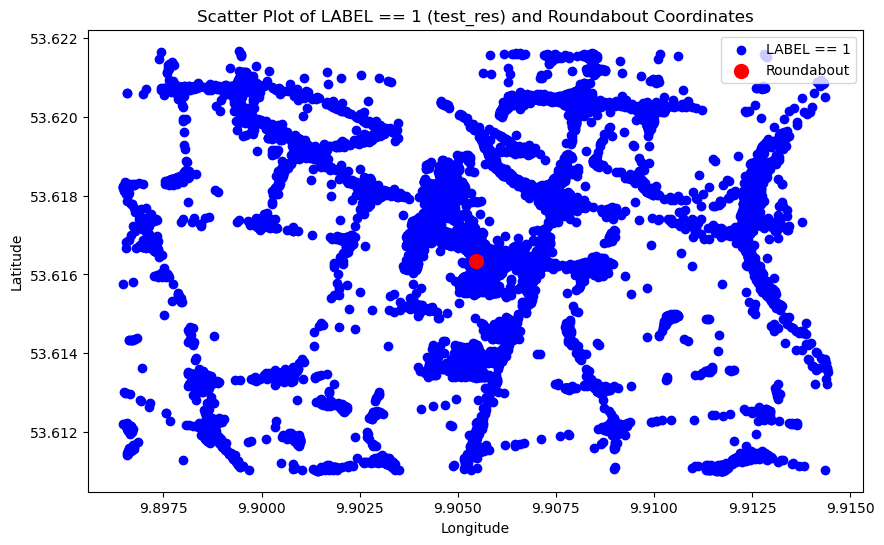

In [40]:
import matplotlib.pyplot as plt

# Sample test_res DataFrame based on previous structure
test_res_label_1 = test_res[test_res['LABEL_XGBoost'] == 1]

# Redefine the roundabout coordinates
roundabout_coords = {'longitude': 9.905460450000007, 'latitude': 53.6163506500001}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot the data where LABEL == 1 from test_res
plt.scatter(test_res_label_1['longitude'], test_res_label_1['latitude'], color='blue', label='LABEL == 1')

# Plot the roundabout coordinates
plt.scatter(roundabout_coords['longitude'], roundabout_coords['latitude'], color='red', label='Roundabout', s=100)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of LABEL == 1 (test_res) and Roundabout Coordinates')
plt.legend()

# Show the plot
plt.show()

In [41]:
# Filter the DataFrame for rows where LABEL == 1
df_label_1 = test_res[test_res['LABEL_XGBoost'] == 1]

# Calculate the centroid
centroid_longitude = df_label_1['longitude'].mean()
centroid_latitude = df_label_1['latitude'].mean()

# Print the centroid coordinates
centroid = (centroid_longitude, centroid_latitude)
print("Centroid of LABEL == 1 coordinates:", centroid)

Centroid of LABEL == 1 coordinates: (9.906013840039073, 53.617618141556484)


In [42]:
import math

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the Haversine distance between two points on the Earth's surface.
    
    Parameters:
    lon1, lat1: Longitude and Latitude of the first point (in degrees)
    lon2, lat2: Longitude and Latitude of the second point (in degrees)
    
    Returns:
    Distance in kilometers between the two points
    """
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lon1_rad = math.radians(lon1)
    lat1_rad = math.radians(lat1)
    lon2_rad = math.radians(lon2)
    lat2_rad = math.radians(lon2)
    
    # Differences between the coordinates
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    
    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Distance in kilometers
    distance = R * c
    return distance

# Example usage: Coordinates of two centroids
centroid1 = (9.905460450000007, 53.6163506500001)  # actual
centroid2 = centroid # Predicted
# Calculate the distance between the two centroids
distance = haversine(centroid1[0], centroid1[1], centroid2[0], centroid2[1])
print(f"Distance between the two centroids: {distance:.2f} km")


Distance between the two centroids: 4860.37 km


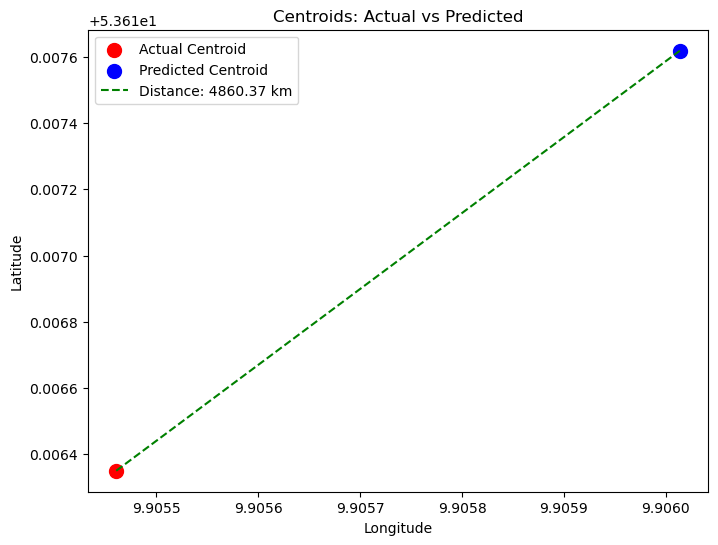

In [44]:
# Redefine centroids
centroid1 = (9.905460450000007, 53.6163506500001)  # Actual centroid
centroid2 = centroid  # Predicted centroid

# Plot centroids
plt.figure(figsize=(8, 6))

# Plot the centroids
plt.scatter(centroid1[0], centroid1[1], color='red', label='Actual Centroid', s=100)
plt.scatter(centroid2[0], centroid2[1], color='blue', label='Predicted Centroid', s=100)

# Draw a line between the centroids
plt.plot([centroid1[0], centroid2[0]], [centroid1[1], centroid2[1]], color='green', linestyle='--', label=f'Distance: {distance:.2f} km')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Centroids: Actual vs Predicted')
plt.legend()

# Show the plot
plt.show()
